In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import os
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet import preprocess_input

In [ ]:
model = InceptionV3(weights='imagenet', include_top=False, input_shape=(229, 229, 3))

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
# define a function to extract features from an image using the MobileNetV2 model
def extract_features(image_path):
    # load the image and resize it to the input shape of the MobileNetV2 model
    image = load_img(image_path, target_size=(229, 229))
    # convert the image to a numpy array
    image = img_to_array(image)
    # preprocess the image for the MobileNetV2 model
    image = preprocess_input(image)
    # use the ResNet152V2 model to extract features from the image
    features = model.predict(np.array([image]))
    # flatten the feature vector to a 1D array
    features = features.flatten()
    return features

In [ ]:
# define the data directory and subdirectories
data_dir = '/content/drive/MyDrive/DR_50'
train_dir = '/content/drive/MyDrive/DR_50/Train'
test_dir = '/content/drive/MyDrive/DR_50/Test'

In [ ]:
train_data = []
train_labels = []
test_data = []
test_labels = []


In [ ]:
for class_dir in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_dir)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        features = extract_features(image_path)
        train_data.append(features)
        train_labels.append(class_dir)

1/1 [==============================] - 0s 89ms/step


In [ ]:
for class_dir in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_dir)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        features = extract_features(image_path)
        test_data.append(features)
        test_labels.append(class_dir)

1/1 [==============================] - 0s 89ms/step


In [ ]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)
test_data = np.array(test_data)
test_labels = np.array(test_labels)


In [ ]:
rf= RandomForestClassifier(n_estimators =100, random_state = 42)
#n_estimators = 50, random_state = 42
# Train the model on training data
rf.fit(train_data, train_labels) #For sklearn no one hot encoding

RandomForestClassifier(random_state=42)

In [ ]:
accuracy = rf.score(test_data,test_labels)
print(f'Accuracy: {accuracy}')

Accuracy: 0.4


In [ ]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 229, 229, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 114, 114, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 114, 114, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 114, 114, 32)         0         ['batch_normalizati

In [ ]:
model.save("newmodel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
def predictRF(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  X=extract_features(filename)
  X=np.array(X)
  X=X.reshape(1,-1)
  output=rf.predict(X)
  print(output)


1/1 [==============================] - 0s 150ms/step
['0']


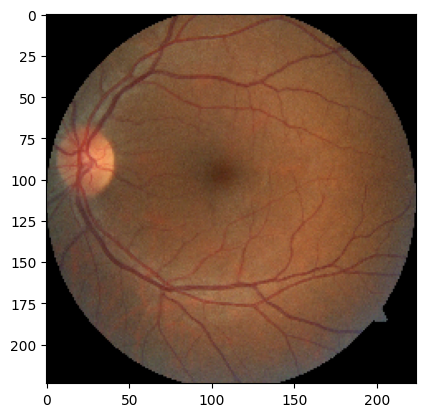

In [ ]:
predictRF("/content/drive/MyDrive/DR_50/Test/0/17.jpg")

1/1 [==============================] - 0s 126ms/step
['4']


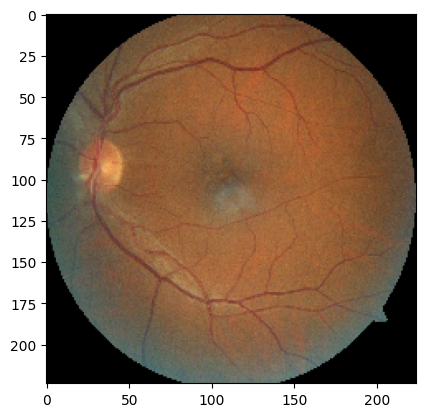

In [ ]:
predictRF("/content/drive/MyDrive/DR_50/Test/1/190.jpg")

1/1 [==============================] - 0s 91ms/step
['2']


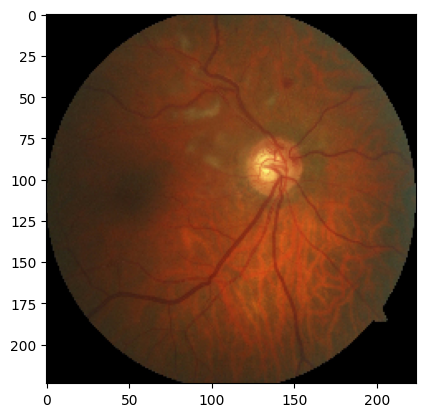

In [ ]:
predictRF("/content/drive/MyDrive/DR_50/Test/2/196.jpg")

1/1 [==============================] - 0s 96ms/step
['4']


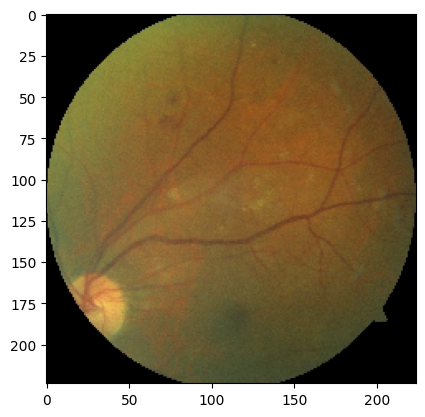

In [ ]:
predictRF("/content/drive/MyDrive/DR_50/Test/3/296.jpg")

1/1 [==============================] - 0s 131ms/step
['0']


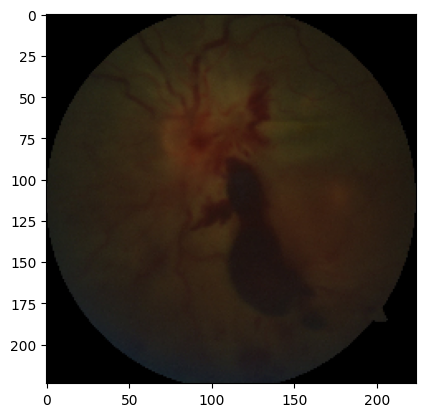

In [ ]:
predictRF("/content/drive/MyDrive/DR_50/Test/4/599.jpg")

1/1 [==============================] - 0s 268ms/step
['4']


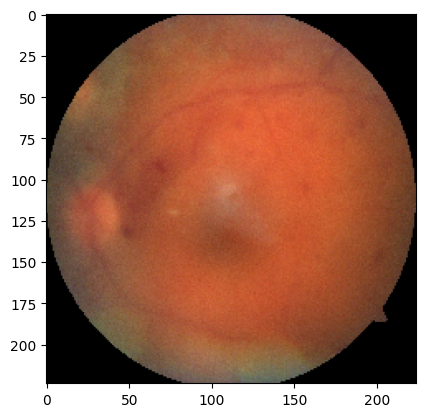

In [ ]:
predictRF('/content/drive/MyDrive/DR_50/Test/4/650.jpg')

1/1 [==============================] - 0s 89ms/step
['2']


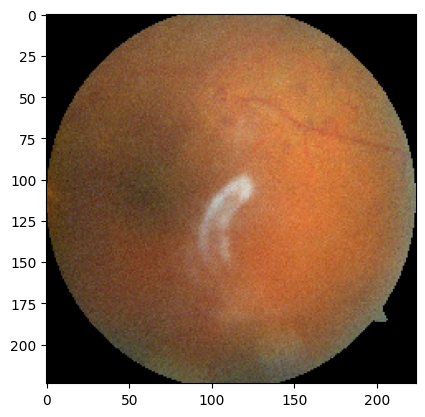

In [ ]:
predictRF("/content/drive/MyDrive/DR_50/Test/4/673.jpg")

1/1 [==============================] - 0s 158ms/step
['4']


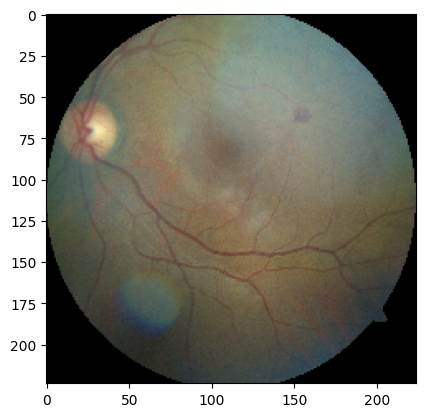

In [ ]:
predictRF("/content/drive/MyDrive/DR_50/Test/2/230.jpg")

1/1 [==============================] - 0s 134ms/step
['3']


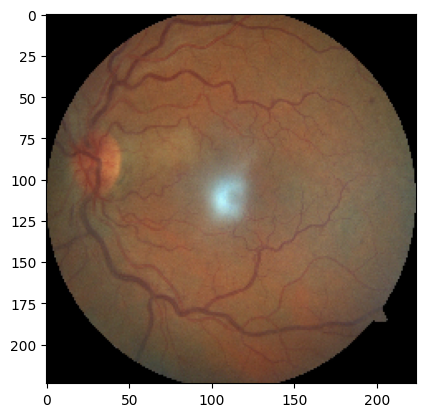

In [ ]:
predictRF("/content/drive/MyDrive/DR_50/Test/3/301.jpg")

1/1 [==============================] - 0s 135ms/step
['3']


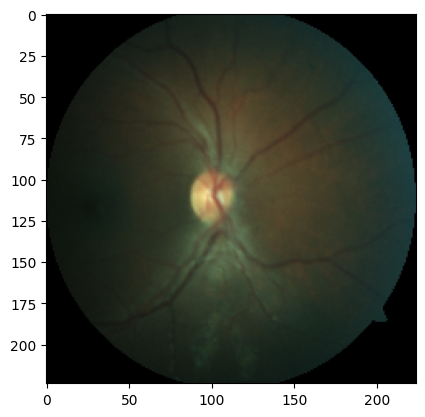

In [ ]:
predictRF("/content/drive/MyDrive/DR_50/Test/1/393_right.png")

In [ ]:
# Make sure you provide the same target size as initialied for the image size
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_set=train_datagen.flow_from_directory('/content/drive/MyDrive/DR_50/Train',target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')
class_name = train_set.class_indices
print(class_name)

Found 175 images belonging to 5 classes.
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}


Text(0.5, 1.0, 'Confusion Matrix')

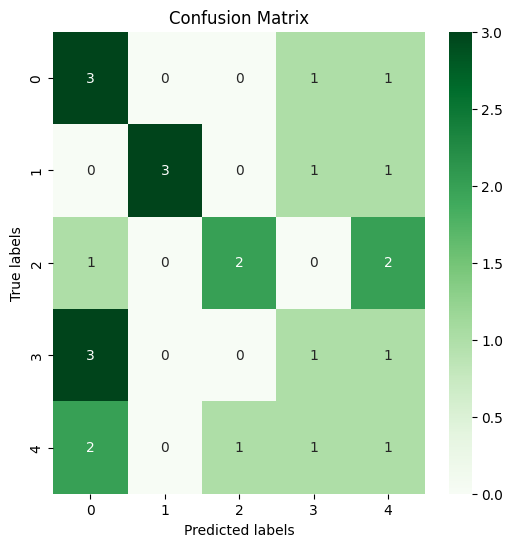

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
y_pred=rf.predict(test_data)
# compute confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# create heatmap from confusion matrix
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d", xticklabels=train_set.class_indices.keys(),
            yticklabels=train_set.class_indices.keys(), ax=ax)

# set axis labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report

# Compute classification report
report = classification_report(test_labels, y_pred, target_names=train_set.class_indices.keys())

# Print classification report
print(report)

              precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       1.00      0.60      0.75         5
           2       0.67      0.40      0.50         5
           3       0.25      0.20      0.22         5
           4       0.17      0.20      0.18         5

    accuracy                           0.40        25
   macro avg       0.48      0.40      0.42        25
weighted avg       0.48      0.40      0.42        25



In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
precision = precision_score(test_labels, y_pred, average='macro')
recall = recall_score(test_labels, y_pred, average='macro')
accuracy = accuracy_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred, average='macro')

print('Precision:', precision)
print('Recall:', recall)
print('Accuracy:', accuracy)
print('F1 Score:', f1)

Precision: 0.4833333333333333
Recall: 0.4
Accuracy: 0.4
F1 Score: 0.41652236652236646
